### DATA 200S Final Project
### Trevor Oldham


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


### Importing Data
First we import the data for annual AQI by county from 2020 and the daily AQI by county from 2020.

In [2]:
annual_aqi_df = pd.read_csv('../data/Dataset_A/AQI_Data/annual_county_aqi/annual_aqi_by_county_2020.csv')

In [3]:
annual_aqi_df.head()

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10
0,Alabama,Baldwin,2020,269,250,19,0,0,0,0,74,49,36,0,0,198,0,71,0
1,Alabama,Clay,2020,108,99,9,0,0,0,0,86,49,26,0,0,0,0,108,0
2,Alabama,DeKalb,2020,364,350,14,0,0,0,0,90,45,36,0,0,331,0,33,0
3,Alabama,Elmore,2020,197,197,0,0,0,0,0,47,41,31,0,0,197,0,0,0
4,Alabama,Etowah,2020,278,260,18,0,0,0,0,92,46,34,0,0,204,0,74,0


In [4]:
daily_aqi_df = pd.read_csv('../data/Dataset_A/AQI_Data/daily_county_aqi/daily_aqi_by_county_2020.csv')

In [5]:
daily_aqi_df.head()

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2020-01-01,48,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2020-01-04,13,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2020-01-07,14,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2020-01-10,39,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2020-01-13,29,Good,PM2.5,01-003-0010,1


In [6]:
daily_aqi_df.drop(columns = ['State Code', 'County Code', 'Defining Parameter', 'Defining Site', 'Number of Sites Reporting'], inplace = True)

In [7]:
daily_aqi_df.head()

,State Name,county Name,Date,AQI,Category
0,Alabama,Baldwin,2020-01-01,48,Good
1,Alabama,Baldwin,2020-01-04,13,Good
2,Alabama,Baldwin,2020-01-07,14,Good
3,Alabama,Baldwin,2020-01-10,39,Good
4,Alabama,Baldwin,2020-01-13,29,Good


### Sorting USA States by Maximum Reported AQI
Next we group the data by State and take the maximum of the AQI values reported by that state in order to sort the states by the maximum AQI value reported in that state in 2020 to find a list of best and worst states.

In [8]:
daily_aqi_by_state = daily_aqi_df.groupby('State Name')['AQI'].max().sort_values(ascending=False)

In [9]:
top_10_daily_aqi_by_state = daily_aqi_by_state[0:10]
worst_states = top_10_daily_aqi_by_state.index
display(top_10_daily_aqi_by_state)

State Name
California     1928
Wyoming        1250
Arizona        1124
Washington      908
Oregon          679
New Mexico      400
Puerto Rico     396
Idaho           384
Nevada          331
Montana         327
Name: AQI, dtype: int64

In [10]:
daily_aqi_worst_states = daily_aqi_df[daily_aqi_df['State Name'].isin(worst_states)]

In [11]:
bottom_10_daily_aqi_by_state = daily_aqi_by_state[-10:]
best_states = bottom_10_daily_aqi_by_state.index
display(bottom_10_daily_aqi_by_state)

State Name
North Dakota      120
Maryland          119
North Carolina    119
South Carolina    117
Kentucky          115
Mississippi       114
Delaware          105
Vermont            98
New Hampshire      90
Virgin Islands     82
Name: AQI, dtype: int64

In [12]:
daily_aqi_best_states = daily_aqi_df[daily_aqi_df['State Name'].isin(best_states)]

### Plotting The Mean AQI by Category for each State
We find that using this metric, California is the worst state because it reported the highest value for AQI. Next we create a bar plot to show the average air quality reported for the worst states grouped by category. This plot shows the mean air quality for each category in that state from 2020, as well as the standard deviation.

<AxesSubplot:title={'center':'Mean Air Quality by Category Across 10 Worst States in 2020'}, xlabel='State Name', ylabel='AQI'>

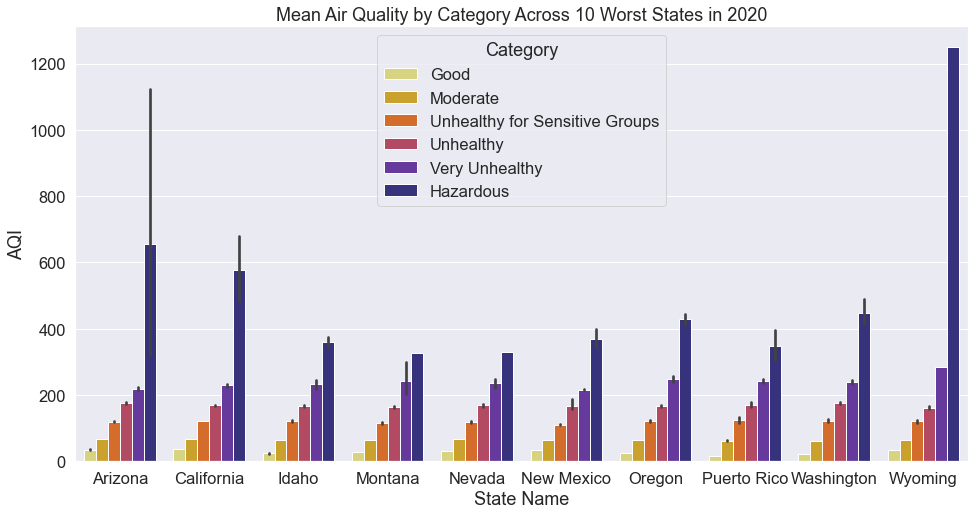

In [13]:
sns.set(font_scale=1.5)
fig, ax = plt.subplots(figsize=[16, 8])

plt.title('Mean Air Quality by Category Across 10 Worst States in 2020')
sns.barplot(data=daily_aqi_worst_states, x="State Name", y="AQI", hue = "Category", palette = 'CMRmap_r')

Again we create a bar plot to show the same data as above but for the ten best states.

<AxesSubplot:title={'center':'Mean Air Quality by Category Across 10 Best States in 2020'}, xlabel='State Name', ylabel='AQI'>

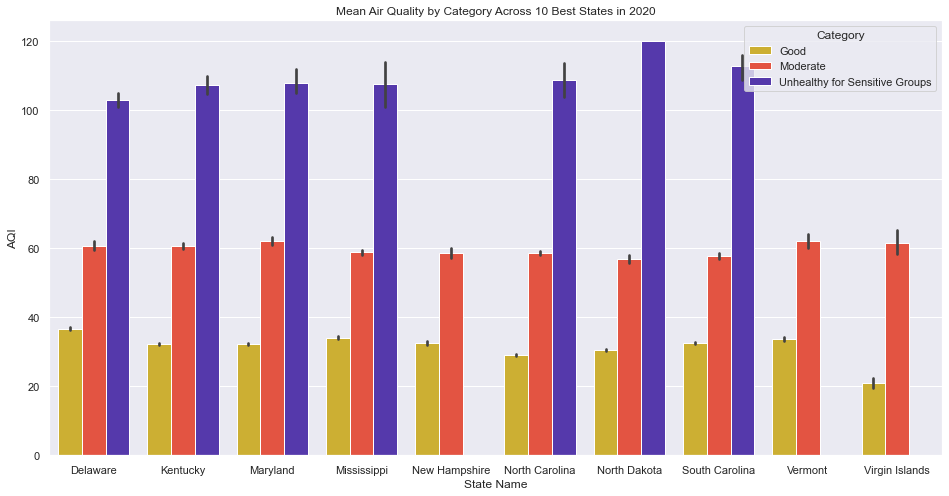

In [14]:
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=[16, 8])

plt.title('Mean Air Quality by Category Across 10 Best States in 2020')
sns.barplot(data=daily_aqi_best_states, x="State Name", y="AQI", hue = "Category", palette = 'CMRmap_r')

### Plotting the Most Commonly Reported Category by Date for Best and Worst State
We want to collect the data in California and create a new dataframe which is grouped by the date, and the Category column is then aggregated by taking the most common value of Category reported that day (mode) and then counting the number of days in which that was the most commonly reported value. We do the same for the best state which is determined to be the US Virgin Islands which had a maximum AQI of 82 as shown above.

In [15]:
def agg_func_category_count(series):
    return pd.Series.mode(series)[0]

category_counts_california = daily_aqi_df[daily_aqi_df['State Name'] == 'California']
category_counts_california = category_counts_california.groupby('Date')['Category'].agg(agg_func_category_count).to_frame()
category_counts_california = category_counts_california['Category'].value_counts().to_frame()
category_counts_california.head(20)

,Category
Good,274
Moderate,71
Unhealthy,16
Unhealthy for Sensitive Groups,5


In [16]:
category_counts_virginislands = daily_aqi_df[daily_aqi_df['State Name'] == 'Virgin Islands']
category_counts_virginislands = category_counts_virginislands.groupby('Date')['Category'].agg(agg_func_category_count).to_frame()
category_counts_virginislands = category_counts_virginislands['Category'].value_counts().to_frame()
category_counts_virginislands.head(20)

,Category
Good,132
Moderate,15


We want to show the results for California next to the results for the US Virgin Islands side by side, using a pie chart to visualize the percentage of days in which the most commonly reported Category of air quality was Moderate or higher. We can see by the two pie charts below that the air quality is generally more hazardous in California during the year 2020 compared to the Virgin Islands. On 25% of the days, the most commonly reported air quality category was Moderate or worse, while in the Virgin Islands the percentage is only 10% of days.

Text(0.5, 0.98, 'Mode of Category By Day in Best and Worst State 2020')

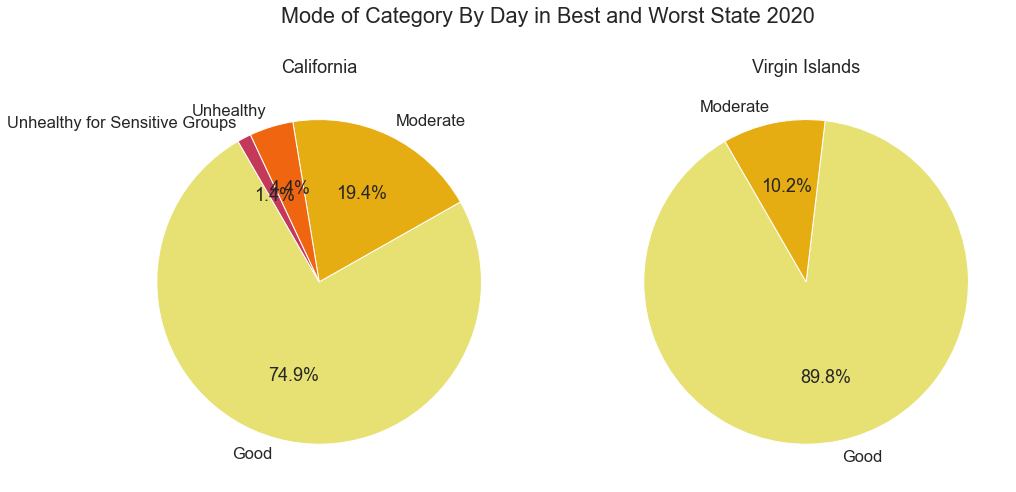

In [17]:
sns.set(font_scale=1.5)
fig, ax = plt.subplots(1, 2, figsize=[16, 8])
colors = sns.color_palette('CMRmap_r')
ax[0].pie(x=category_counts_california['Category'], labels=category_counts_california.index, colors = colors, startangle=120, autopct='%1.1f%%')
ax[0].set_title('California')

ax[1].pie(x=category_counts_virginislands['Category'], labels=category_counts_virginislands.index, colors = colors, startangle=120, autopct='%1.1f%%')
ax[1].set_title('Virgin Islands')
fig.suptitle('Mode of Category By Day in Best and Worst State 2020')

### Visual Comparison of Distribution of Median AQI Reported in 2020
To examine the air quality of the other states we group by state and take the average value of the median AQI reported from each site in the dataframe. We want to show the difference between the counties of California against the states in the USA.

In [18]:
median_aqi_by_state = annual_aqi_df.groupby('State')['Median AQI'].mean()
median_aqi_by_state.head()

State
Alabama       34.533333
Alaska        16.111111
Arizona       47.307692
Arkansas      33.000000
California    48.018868
Name: Median AQI, dtype: float64

In [19]:
median_aqi_california_by_county = daily_aqi_df[daily_aqi_df['State Name'] == 'California'].groupby('county Name')['AQI'].mean().sort_values(ascending = False)
median_aqi_california_by_county.head()

county Name
San Bernardino    106.314208
Mono              102.431694
Los Angeles        96.986339
Riverside          96.983607
Kern               86.806011
Name: AQI, dtype: float64

We create a histogram of the average value of median AQI reported in 2020, showing the distribution over the states in the USA and overlaying the distribution of the same value reported from counties in California, and the resulting diagram shows that the AQI in California counties is shifted to the right which shows that the air quality is generally worse in California in 2020 than the same measurement taken across all other US states.

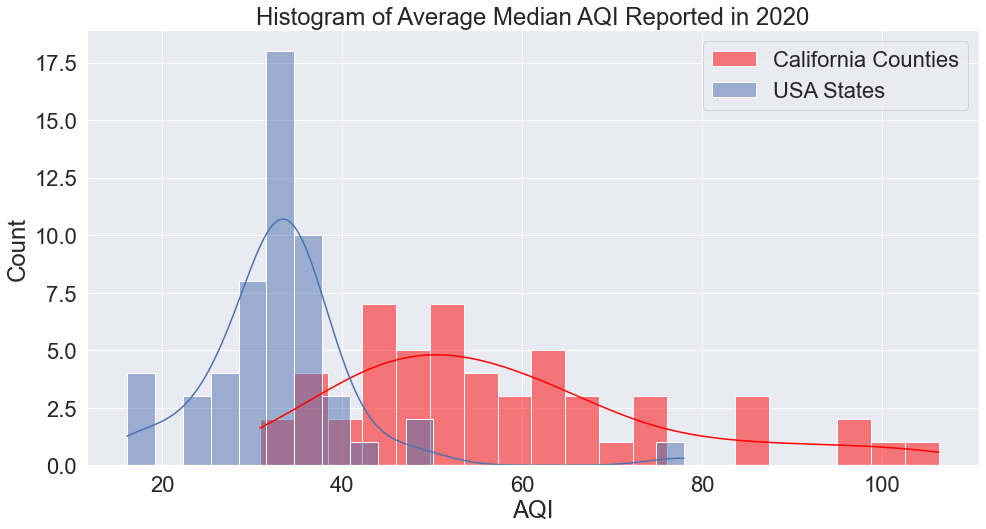

In [20]:
sns.set(font_scale=2)
fig, ax = plt.subplots(1, 1, figsize=[16, 8])
sns.histplot(median_aqi_california_by_county, color = 'red', bins = 20, alpha = 0.5, kde = True, label="California Counties")
sns.histplot(median_aqi_by_state, bins = 20, alpha = 0.5, kde = True, label = 'USA States')
plt.title("Histogram of Average Median AQI Reported in 2020")
plt.legend()

### Average Median AQI Reported in 2020, 2021, and 2022

We want to visually compare the difference of a wildfire season in California against subsequent years. We will group the daily aqi data by county and take the mean of the Median AQI reported by each of the counties in California, then create a Kernel Density Estimate plot to show the right shifted curve of a wildfire season.

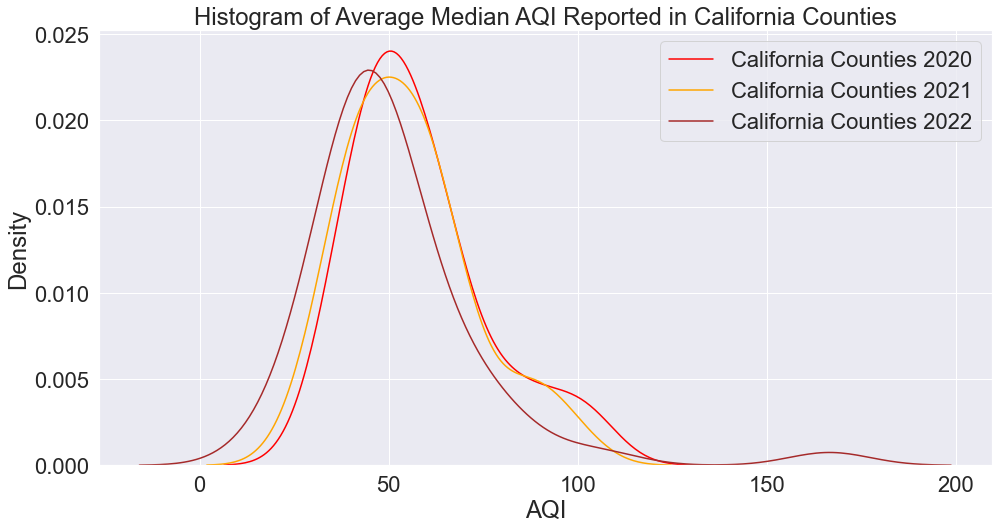

In [21]:
daily_aqi_2021 = pd.read_csv('../data/Dataset_A/AQI_Data/daily_county_aqi/daily_aqi_by_county_2021.csv')
median_aqi_california_by_county_2021 = daily_aqi_2021[daily_aqi_2021['State Name'] == 'California'].groupby('county Name')['AQI'].mean()

daily_aqi_2022 = pd.read_csv('../data/Dataset_A/AQI_Data/daily_county_aqi/daily_aqi_by_county_2022.csv')
median_aqi_california_by_county_2022 = daily_aqi_2022[daily_aqi_2022['State Name'] == 'California'].groupby('county Name')['AQI'].mean()

fig, ax = plt.subplots(1, 1, figsize=[16, 8])
colors = sns.color_palette('CMRmap_r')
sns.kdeplot(median_aqi_california_by_county, color = 'red', label="California Counties 2020")
sns.kdeplot(median_aqi_california_by_county_2021, color = 'orange', label="California Counties 2021")
sns.kdeplot(median_aqi_california_by_county_2022, color = 'brown', label="California Counties 2022")
plt.title("Histogram of Average Median AQI Reported in California Counties")
plt.legend()

# Modelling AQI by Greenhouse Gas Measurements in 2020
First we take the greenhouse gasses columns of the original dataframe as well as the state, county, and median AQI.

In [22]:
annual_gasses_df = annual_aqi_df[['State', 'County','Days SO2', 'Days CO', 'Days Ozone', 'Days NO2', 'Days PM2.5', 'Median AQI']]
annual_gasses_df.head()

,State,County,Days SO2,Days CO,Days Ozone,Days NO2,Days PM2.5,Median AQI
0,Alabama,Baldwin,0,0,198,0,71,36
1,Alabama,Clay,0,0,0,0,108,26
2,Alabama,DeKalb,0,0,331,0,33,36
3,Alabama,Elmore,0,0,197,0,0,31
4,Alabama,Etowah,0,0,204,0,74,34


We examine the datafrane to look for duplicate values in the County column, which are counties in different states which share a name with another county in a different state. We remove the duplicates to ensure that every value for County name is unique.

In [23]:
unique_counties = len(annual_gasses_df['County'].unique())
unique_counties

803

In [24]:
annual_gasses_df.shape

(1040, 8)

In [25]:
annual_gasses_df.drop_duplicates(subset=['County'], inplace = True)
annual_gasses_df.shape

<ipython-input-25-547c09467a3b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  annual_gasses_df.drop_duplicates(subset=['County'], inplace = True)


(803, 8)

Now we group the data by County name and take the sum of each column category for all the unique counties. This dataframe will represent the input data we will use with a linear model and a train/test split to predict the Median AQI. The input data will be split into a training group and a validation group.

In [26]:

annual_gasses_by_county = annual_gasses_df.groupby('County')[['Days SO2', 'Days CO', 'Days Ozone', 'Days NO2', 'Days PM2.5', 'Median AQI']].mean()
annual_gasses_by_county = annual_gasses_by_county[annual_gasses_by_county['Median AQI'] < 61]
annual_gasses_by_county = annual_gasses_by_county[annual_gasses_by_county['Median AQI'] > 10]

In [27]:
annual_gasses_by_county.head()
annual_gasses_by_county.describe()

,Days SO2,Days CO,Days Ozone,Days NO2,Days PM2.5,Median AQI
count,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000
mean,5.368421,0.288799,186.881242,4.066127,120.315789,34.431849
std,29.544845,4.775528,118.566936,19.096899,111.168633,8.150925
min,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000
25%,0.000000,0.000000,114.000000,0.000000,2.000000,31.000000
50%,0.000000,0.000000,209.000000,0.000000,113.000000,36.000000
75%,0.000000,0.000000,258.000000,0.000000,179.000000,39.000000
max,366.000000,124.000000,366.000000,276.000000,366.000000,58.000000


In [28]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing

In [29]:
X = annual_gasses_by_county.drop(columns = 'Median AQI')

y = annual_gasses_by_county['Median AQI']

scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)


In [30]:
sklearn_model = LinearRegression(fit_intercept = True)
sklearn_model.fit(X_train, y_train)
print("sklearn with bias column thetas:")
print("Intercept : ", sklearn_model.intercept_)
print("Coefficients : ", sklearn_model.coef_)

sklearn with bias column thetas:
Intercept :  34.376864491906126
Coefficients :  [-0.37642491 -0.35479422  6.46523493  0.08701917  3.35345752]


In [31]:
def rmse(predicted, actual):
    """
    Calculates RMSE from actual and predicted values
    Input:
      predicted (1D array): vector of predicted/fitted values
      actual (1D array): vector of actual values
    Output:
      a float, the root-mean square error
    """
    return np.sqrt(np.mean((actual - predicted)**2))

In [32]:
training_error = rmse(sklearn_model.predict(X_train), y_train)
validation_error = rmse(sklearn_model.predict(X_test), y_test)

print(training_error)
print(validation_error)

6.401867081524373
6.624051072834918


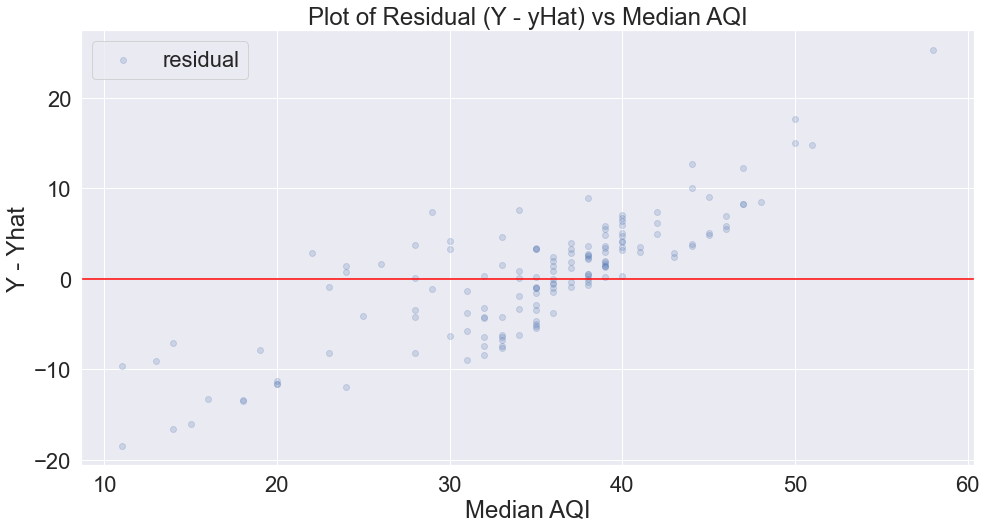

In [33]:
residual = y_test - sklearn_model.predict(X_test)

fig, ax = plt.subplots(1, 1, figsize=[16, 8])
plt.scatter(y_test, residual, alpha = 0.2, label="residual")
plt.title("Plot of Residual (Y - yHat) vs Median AQI")
plt.axhline(0, color = "red")
plt.xlabel("Median AQI")
plt.ylabel("Y - Yhat")
plt.legend()

In [34]:
 sklearn_model.predict(X_train)

array([35.08729405, 40.09892675, 23.87930544, 20.50448616, 38.44465087,
       34.03765346, 40.34622054, 23.78874781, 28.73088655, 20.6192308 ,
       35.25098897, 37.15241812, 40.2080567 , 40.37175163, 31.36540275,
       31.45596038, 33.32029172, 35.99794801, 40.2080567 , 34.77617255,
       31.63707563, 35.96490416, 33.44199985, 34.42416939, 33.98424047,
       32.99972011, 37.99033075, 36.30855295, 37.19258797, 40.04436178,
       35.54251528, 40.04436178, 40.15349173, 34.31503944, 40.4263166 ,
       34.21406709, 39.71697193, 20.6192308 , 31.63707563, 35.98337339,
       40.2080567 , 30.49001233, 38.47135008, 37.95967794, 38.42027177,
       29.0109044 , 35.25444494, 31.66726151, 35.43273309, 36.20158625,
       36.13949952, 21.94740935, 36.64174957, 33.05132162, 38.49340906,
       36.25053201, 29.0109044 , 23.96986306, 36.04950245, 21.22294832,
       36.18723815, 35.57698171, 20.98146131, 36.56160667, 33.20521447,
       36.68115134, 33.24071267, 31.546518  , 40.59001153, 34.34

### Analyzing the Collinearity of Features from The Linear Regression Model

We suspect that the features used in the above linear model have some non-zero correlation which makes the Linear Regression model less accurate and makes it more difficult for the model to find the correct weights for the estimation. We will use a heatmap to demonstrate the correlation of each feature against each other feature to determine which features have an effect on the others.

In [35]:
annual_gasses_by_county.head()

,Days SO2,Days CO,Days Ozone,Days NO2,Days PM2.5,Median AQI
County,,,,,,
Ada,0.0,0.0,214.0,22.0,124.0,40.0
Adair,0.0,1.0,219.0,0.0,134.0,33.0
Adams,0.0,0.0,179.0,68.0,59.0,47.0
Adjuntas,0.0,0.0,0.0,0.0,57.0,14.0
Aiken,0.0,0.0,259.0,0.0,0.0,32.0


In [36]:
annual_gasses_by_county.describe()

,Days SO2,Days CO,Days Ozone,Days NO2,Days PM2.5,Median AQI
count,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000
mean,5.368421,0.288799,186.881242,4.066127,120.315789,34.431849
std,29.544845,4.775528,118.566936,19.096899,111.168633,8.150925
min,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000
25%,0.000000,0.000000,114.000000,0.000000,2.000000,31.000000
50%,0.000000,0.000000,209.000000,0.000000,113.000000,36.000000
75%,0.000000,0.000000,258.000000,0.000000,179.000000,39.000000
max,366.000000,124.000000,366.000000,276.000000,366.000000,58.000000


Text(0.5, 1.0, 'Correlation of Features in Daily Gasses by County Dataframe')

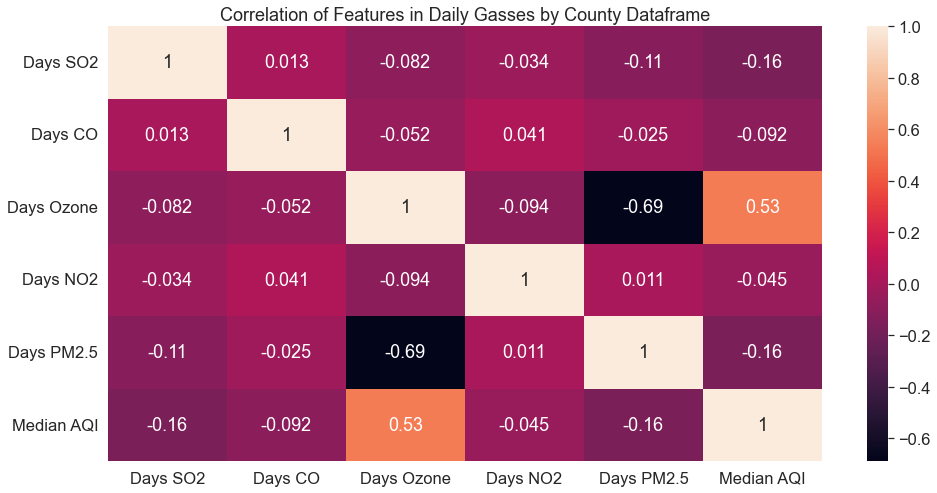

In [37]:
sns.set(font_scale = 1.5)
fig, ax = plt.subplots(1, 1, figsize=[16, 8])
sns.heatmap(annual_gasses_by_county.corr(), annot=True)
plt.title("Correlation of Features in Daily Gasses by County Dataframe")

### Analyzing Daily Ozone Levels

We wish to see the trend with daily levels of ozone over the course of one year. We will then look for ways to implement more features into the above linear model and also attempt to create a linear model to predict the AQI on a given day, based off of daily greenhouse gas measurements.

In [38]:
daily_ozone_2020 = pd.read_csv('../data/Dataset_A/AQI_Data/daily_ozone/daily_44201_2020.csv')
daily_ozone_2020.head()

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,5,NaN,-,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2021-02-25
1,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,47,NaN,-,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2021-02-25
2,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,40,NaN,-,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2021-02-25
3,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,39,NaN,-,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2021-02-25
4,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,32,NaN,-,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2021-02-25


In [39]:
daily_ozone_2020_reduced = daily_ozone_2020[['State Name', 'County Name', 'AQI', 'Arithmetic Mean', 'Date Local']]
daily_ozone_2020_reduced.head()

,State Name,County Name,AQI,Arithmetic Mean,Date Local
0,Alabama,Baldwin,5,0.005000,2020-02-29
1,Alabama,Baldwin,47,0.046941,2020-03-01
2,Alabama,Baldwin,40,0.040083,2020-03-02
3,Alabama,Baldwin,39,0.034118,2020-03-03
4,Alabama,Baldwin,32,0.027882,2020-03-04


In [40]:
daily_ozone_2020_california = daily_ozone_2020_reduced[daily_ozone_2020_reduced['State Name'] == 'California']
daily_ozone_2020_california_worst = daily_ozone_2020_california[daily_ozone_2020_california['County Name'] == 'San Bernardino']
worst_daily_ozone_county = daily_ozone_2020_california_worst.groupby('Date Local')[['AQI', 'Arithmetic Mean']].mean()
worst_daily_ozone_county.head()

,AQI,Arithmetic Mean
Date Local,,
2020-01-01,34.909091,0.028615
2020-01-02,31.818182,0.024749
2020-01-03,26.909091,0.017417
2020-01-04,34.272727,0.023930
2020-01-05,36.090909,0.029556


Text(0.5, 1.0, 'Daily Ozone Measurements and Daily AQI Reported in San Bernardino County 2020')

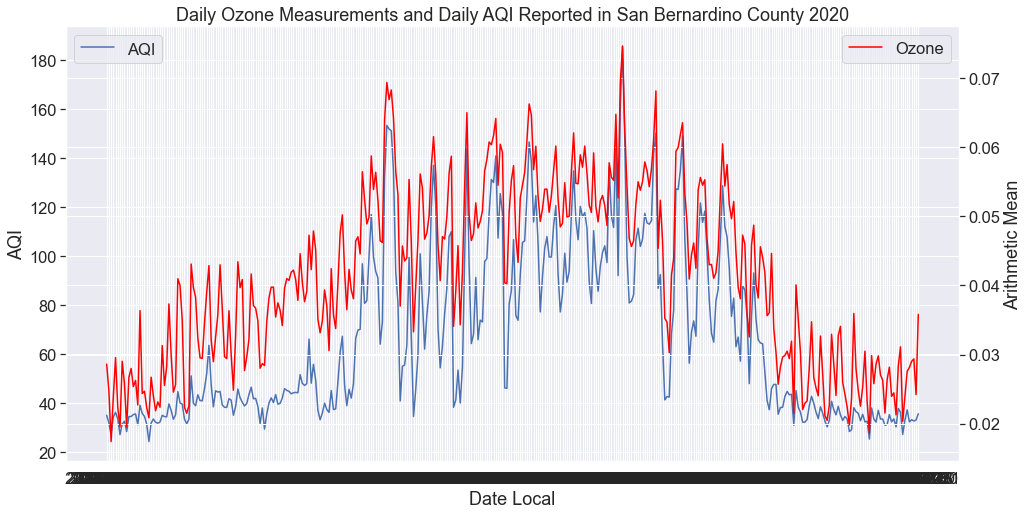

In [41]:
sns.set(font_scale = 1.5)
fig, ax = plt.subplots(1, 1, figsize=[16, 8])
ax = sns.lineplot(data = worst_daily_ozone_county, x = worst_daily_ozone_county.index, y = "AQI", label = "AQI")
ax.legend(loc = 'upper left')
ax2 = ax.twinx()
ax2 = sns.lineplot(data = worst_daily_ozone_county, x = worst_daily_ozone_county.index, color = 'red', y = "Arithmetic Mean", label = "Ozone")
ax2.legend(loc='upper right')
plt.title("Daily Ozone Measurements and Daily AQI Reported in San Bernardino County 2020")


<AxesSubplot:xlabel='Arithmetic Mean', ylabel='AQI'>

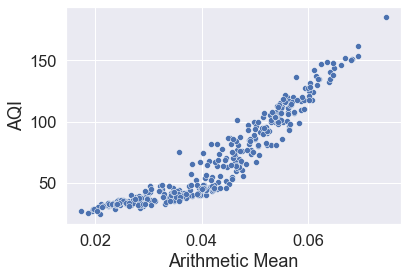

In [42]:
sns.scatterplot(data = worst_daily_ozone_county, x="Arithmetic Mean", y = 'AQI')

Examining the distribution of AQI vs ozone measurements in San Bernardino county suggests that we need the model to be more than a linear model, and so we transform the AQI variables by taking the log of AQI. A new model is fit using the sklearn Linear Regression framework and the San Bernardino data is divided into a train/test split.

In [43]:

X = worst_daily_ozone_county.drop(columns = 'AQI')

y = np.log(worst_daily_ozone_county['AQI'])

scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

X.head()

,Arithmetic Mean
Date Local,
2020-01-01,0.028615
2020-01-02,0.024749
2020-01-03,0.017417
2020-01-04,0.023930
2020-01-05,0.029556


In [44]:
sklearn_model = LinearRegression(fit_intercept = True)
sklearn_model.fit(X_train, y_train)
print("sklearn with bias column thetas:")
print("Intercept : ", sklearn_model.intercept_)
print("Coefficients : ", sklearn_model.coef_)

sklearn with bias column thetas:
Intercept :  4.069245206800895
Coefficients :  [0.48035489]


In [45]:
training_error = rmse(sklearn_model.predict(X_train), y_train)
validation_error = rmse(sklearn_model.predict(X_test), y_test)

print(training_error)
print(validation_error)

0.14386729992291009
0.1550508353125128


The new simplified model is performed on the test set of San Bernardino county data and the residual is plotted as well as the performance of the prediction model overlaid on top of a scatter plot containing the test data. The new model performs very well and demonstrates that AQI can be predicted using just ozone measurements and that this model exemplifies the correlation between AQI and ozone, even in the absence of particulate matter from wildfires. This model shows that the most populous counties which are among the worst counties by AQI metrics have more industry and traffic volume than less populous counties which are susceptible to wildfire seasons.

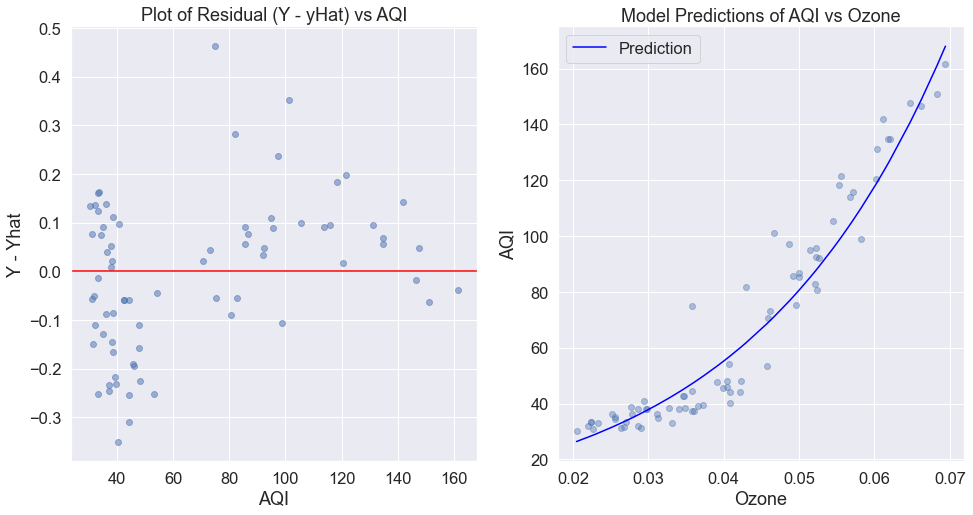

In [46]:
residual = y_test - sklearn_model.predict(X_test)
y_pred = sklearn_model.predict(X_test)
X_original = scaler.inverse_transform(X_test)
new_x, new_y = zip(*sorted(zip(X_original, np.exp(y_pred))))

fig, ax = plt.subplots(1, 2, figsize=[16, 8])
ax[0].scatter(np.exp(y_test), residual, alpha = 0.5, label="residual")
ax[0].set_title("Plot of Residual (Y - yHat) vs AQI")
ax[0].axhline(0, color = "red")
ax[0].set_xlabel("AQI")
ax[0].set_ylabel("Y - Yhat")

ax[1].plot(new_x, new_y, color = 'blue', label = 'Prediction')
ax[1].scatter(X_original, np.exp(y_test), alpha=0.4)
ax[1].set_title("Model Predictions of AQI vs Ozone")
ax[1].set_xlabel("Ozone")
ax[1].set_ylabel("AQI")
ax[1].legend()


This simplified model predicts the daily AQI with high accuracy and matches the non-linear relationship between ozone measurements and AQI. Further analysis of this model is mentioned in the final report.